In [1]:
from dlc_practical_prologue import generate_pair_sets

nSamples = 1000
data = generate_pair_sets(nSamples)
var_names = ["train_input", "train_target", "train_classes", "test_input", "test_target", "test_classes"]
train_input, train_target, train_classes, test_input, test_target, test_classes = data
stringWidth = 20
for i, el in enumerate(list(map(lambda x: (x.shape, x.dtype), data))):
    print('{:s}  {:s}  {:s}'.format(
        var_names[i].ljust(stringWidth),
        ' x '.join(list(map(lambda x: str(x), list(el[0])))).center(stringWidth), 
        'dtype'.ljust(stringWidth)))

train_input            1000 x 2 x 14 x 14   dtype               
train_target                  1000          dtype               
train_classes               1000 x 2        dtype               
test_input             1000 x 2 x 14 x 14   dtype               
test_target                   1000          dtype               
test_classes                1000 x 2        dtype               


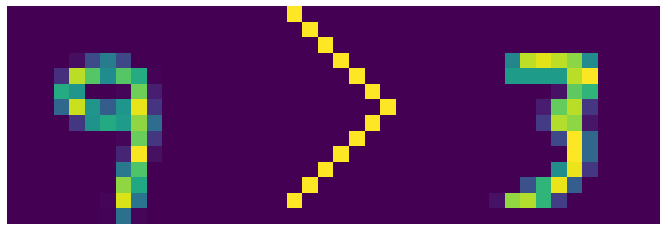

In [2]:
from utils import show_pair

show_pair(train_input, train_target, 0)

## Without using the information from the classes

In [3]:
from utils import train_model
from models.net1 import Net1
import torch
import torch.nn as nn

model = Net1(50)
criterion = nn.BCEWithLogitsLoss()
eta = 1e-3
mini_batch_size = 100
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model(model, train_input, train_target.float(), test_input, test_target, nb_epochs, mini_batch_size, optimizer, criterion)

/home/relja/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:145: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(


Epoch 0: loss 9.317 / train accuracy 77.6%, test accuracy 76.3
Epoch 1: loss 4.913 / train accuracy 81.3%, test accuracy 78.9
Epoch 2: loss 4.256 / train accuracy 84.7%, test accuracy 80.3
Epoch 3: loss 3.511 / train accuracy 86.5%, test accuracy 81.7
Epoch 4: loss 3.208 / train accuracy 90.5%, test accuracy 83.1
Epoch 5: loss 2.833 / train accuracy 89.0%, test accuracy 81.6
Epoch 6: loss 2.741 / train accuracy 92.0%, test accuracy 83.0
Epoch 7: loss 2.361 / train accuracy 93.7%, test accuracy 85.6
Epoch 8: loss 1.992 / train accuracy 95.4%, test accuracy 84.0
Epoch 9: loss 1.787 / train accuracy 94.8%, test accuracy 84.7


In [4]:
nParams = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('The model has {:d} trainable parameters'.format(nParams))

The model has 29789 trainable parameters


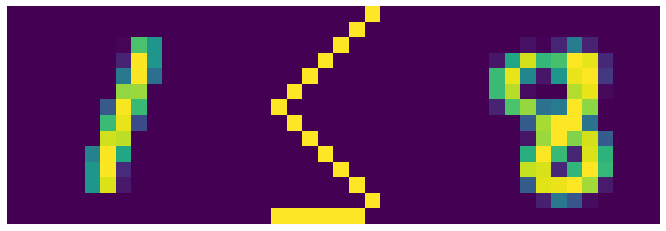

In [5]:
predictions = model(test_input)
show_pair(test_input, predictions, 10)

## With class information during training

In [6]:
from utils import train_model_double_objective
from models.net2 import Net2

model = Net2(50)
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 373.599 / train accuracy 75.7%, test accuracy 76.0
Epoch 1: loss 142.541 / train accuracy 83.3%, test accuracy 82.4
Epoch 2: loss 97.882 / train accuracy 87.0%, test accuracy 86.4
Epoch 3: loss 75.319 / train accuracy 90.4%, test accuracy 86.9
Epoch 4: loss 65.818 / train accuracy 90.6%, test accuracy 87.3
Epoch 5: loss 50.576 / train accuracy 93.2%, test accuracy 89.4
Epoch 6: loss 46.370 / train accuracy 92.1%, test accuracy 87.5
Epoch 7: loss 44.755 / train accuracy 94.2%, test accuracy 89.3
Epoch 8: loss 40.524 / train accuracy 94.4%, test accuracy 89.9
Epoch 9: loss 31.748 / train accuracy 95.3%, test accuracy 89.8


In [7]:
from utils import accuracy_of_digit_class
print("Accuracy: {:.2f}".format(accuracy_of_digit_class(model, test_input, test_classes)))

Accuracy: 94.70


## Pretrained digit classifier

In [8]:
from models.digit_classifier import DigitClassifier
import torch
from torch import nn
from utils import train_model

mini_batch_size = 100
model_classifier = DigitClassifier(out_h = 10, subnet = False)

optimizer = torch.optim.Adam(model_classifier.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()
train_in = train_input[:, 0, :, :].unsqueeze(axis = 1)
train_class = train_classes[:,0]
test_in = test_input[:, 0, :, :].unsqueeze(axis = 1)
test_class = test_classes[:,0]

train_model(model = model_classifier, 
            train_input = train_in, train_target = train_class,
            test_input = test_in, test_target = test_class,
            nb_epochs = 20, mini_batch_size = 100, 
            optimizer = optimizer, criterion = criterion,
            verbose = True)

Epoch 0: loss 32.280 / train accuracy 35.9%, test accuracy 28.8
Epoch 1: loss 18.608 / train accuracy 60.7%, test accuracy 57.4
Epoch 2: loss 13.218 / train accuracy 75.4%, test accuracy 69.0
Epoch 3: loss 8.785 / train accuracy 85.3%, test accuracy 79.2
Epoch 4: loss 5.846 / train accuracy 90.9%, test accuracy 85.0
Epoch 5: loss 4.669 / train accuracy 91.9%, test accuracy 86.8
Epoch 6: loss 4.086 / train accuracy 92.2%, test accuracy 87.8
Epoch 7: loss 3.087 / train accuracy 95.2%, test accuracy 89.4
Epoch 8: loss 2.218 / train accuracy 96.5%, test accuracy 90.8
Epoch 9: loss 2.117 / train accuracy 97.2%, test accuracy 90.5
Epoch 10: loss 1.741 / train accuracy 96.8%, test accuracy 89.3
Epoch 11: loss 1.413 / train accuracy 98.6%, test accuracy 92.5
Epoch 12: loss 1.281 / train accuracy 98.9%, test accuracy 91.1
Epoch 13: loss 1.203 / train accuracy 99.1%, test accuracy 91.0
Epoch 14: loss 0.875 / train accuracy 99.6%, test accuracy 91.0
Epoch 15: loss 0.642 / train accuracy 99.8%, te

In [9]:
from utils import train_model_double_objective
from models.net4 import Net4

model = Net4(model_classifier)
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 129.330 / train accuracy 86.2%, test accuracy 84.5
Epoch 1: loss 75.703 / train accuracy 88.5%, test accuracy 85.6
Epoch 2: loss 69.721 / train accuracy 91.1%, test accuracy 86.3
Epoch 3: loss 51.596 / train accuracy 91.4%, test accuracy 86.9
Epoch 4: loss 50.063 / train accuracy 91.3%, test accuracy 87.0
Epoch 5: loss 46.944 / train accuracy 93.4%, test accuracy 89.0
Epoch 6: loss 33.814 / train accuracy 95.2%, test accuracy 89.7
Epoch 7: loss 28.713 / train accuracy 95.0%, test accuracy 87.6
Epoch 8: loss 23.977 / train accuracy 96.2%, test accuracy 89.9
Epoch 9: loss 28.660 / train accuracy 97.1%, test accuracy 90.0
